In [267]:
%store -r mat_dic
%store -r path_dic
%store -r cell_length

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [269]:
unequal_radius = mat_safe.loc[mat_safe['LargerNode'] != mat_safe['RadiusMCNC']]

In [270]:
len(unequal_radius.loc[unequal_radius['RadiusMCNC'].between(unequal_radius['LargerNode']-0.3, unequal_radius['LargerNode'])])

76

In [271]:
unequal_radius.loc[unequal_radius['RadiusMCNC'].between(unequal_radius['LargerNode']-1.5, unequal_radius['LargerNode']-0.29), 
                  ['LargerNode', 'RadiusMCNC']]

,LargerNode,RadiusMCNC
SBE,6.06950,5.77727
SYT,3.94470,3.37006
DFO,5.44510,4.22833
WEN,2.56386,1.96205
MWW,4.64396,4.01447
VFI,5.81383,5.49665
LTJ,1.84809,1.55530
IRR,7.02949,6.22195
LTF,3.87814,3.17323
STF,3.61468,2.99043


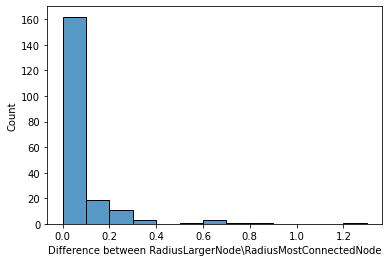

In [272]:
radius_pore1 = mat_safe.loc[:, ['LargerNode', 'RadiusMCNC']]
radius_pore = radius_pore1.assign(radius_diff=radius_pore1['LargerNode']-radius_pore1['RadiusMCNC'])
ax = sns.histplot(data=radius_pore, x="radius_diff",  binwidth= 0.1)
ax.set(xlabel='Difference between RadiusLargerNode\RadiusMostConnectedNode')
plt.savefig('../result/DiffRadius.jpg')

In [273]:
radius_pore.sort_values(by='radius_diff', ascending=False).iloc[0:11, :]

,LargerNode,RadiusMCNC,radius_diff
DFO,5.44510,4.22833,1.21677
IRR,7.02949,6.22195,0.80754
LTF,3.87814,3.17323,0.70491
MWW,4.64396,4.01447,0.62949
STF,3.61468,2.99043,0.62425
WEN,2.56386,1.96205,0.60181
SYT,3.94470,3.37006,0.57464
PTY,2.35702,1.95855,0.39847
SAF,3.13126,2.81279,0.31847
VFI,5.81383,5.49665,0.31718


In [274]:
relative_dic =  {}
path_df = pd.DataFrame(path_dic).transpose()
path_df_red = path_df.loc[:, ['-100', '0-10', '00-1']]
list_names = list(path_df_red.index)

for name in list_names:
    temp_rel = {}
    for axis in ['-100', '0-10', '00-1']:
        temp_rel['path_' + axis] = path_df_red.loc[path_df_red.index == name, [axis]].values[0][0][0]/cell_length[name][axis]
#         temp_rel['vol_' + axis] = path_df_red.loc[path_df_red.index == name, [axis]].values[0][0][1]
        temp_rel['vol_' + axis] = path_df_red.loc[path_df_red.index == name, [axis]].values[0][0][2]
    relative_dic[name] = temp_rel

In [277]:
list(cell_length.keys())[:82] == list(path_df_red.index)
# print(len(list(path_df_red.index)))

True

In [278]:
pd.DataFrame(relative_dic).transpose().sort_values(by='vol_-100', ascending=False)
pd.DataFrame(relative_dic).transpose().sort_values(by='vol_0-10', ascending=False)
pd.DataFrame(relative_dic).transpose().sort_values(by='vol_00-1', ascending=False)

,path_-100,vol_-100,path_0-10,vol_0-10,path_00-1,vol_00-1
VFI,1.189565,23.73,1.189565,23.72,1.000116,94.91
ETR,0.936803,6.54,0.936803,6.54,1.047947,57.27
RHO,1.286279,20.13,1.012802,31.74,1.284268,57.04
BPH,0.985678,19.68,0.985678,19.68,1.048654,56.02
IRY,0.921636,69.29,0.938564,68.55,1.052781,43.38
...,...,...,...,...,...,...
SVR,1.254900,6.89,1.198136,3.26,1.098879,1.43
NSI,1.150825,2.94,1.045117,5.75,1.320565,1.22
MVY,1.061542,1.58,1.459944,1.22,1.208414,1.21
AST,0.999706,0.71,0.999706,0.71,0.999706,0.71


In [279]:
connec_df = pd.DataFrame(relative_dic).transpose()
# sns.histplot(data=connec_df, x="vol_00-1", kde=True, bins=10)
# for 
# ax = sns.boxplot(x=connec_df["vol_00-1"])

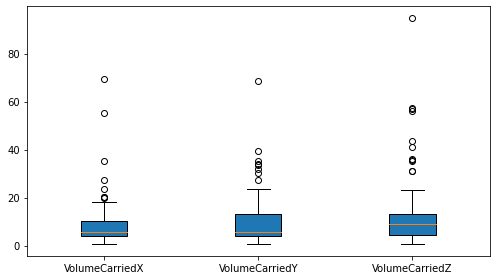

In [286]:
fig, ax = plt.subplots(figsize=(7,4))


dic_temp = {'VolumeCarriedX':list(connec_df['vol_-100'].values), 
            'VolumeCarriedY':list(connec_df['vol_0-10'].values), 
            'VolumeCarriedZ':list(connec_df['vol_00-1'].values)}
ax.boxplot(dic_temp.values(), patch_artist=True )
ax.set_xticklabels(dic_temp.keys(), fontdict={'fontsize':10})
# ax.set_yticklabels(list(range(-10,70,10)),fontdict={'fontsize':10})
plt.tight_layout()
plt.savefig('../result/VolBoxPlot.jpg')

In [281]:
list(range(0,60,10))

[0, 10, 20, 30, 40, 50]

In [287]:
pd.DataFrame(relative_dic).transpose().sort_values(by='vol_-100', ascending=False).iloc[:10, :]

,path_-100,vol_-100,path_0-10,vol_0-10,path_00-1,vol_00-1
IRY,0.921636,69.29,0.938564,68.55,1.052781,43.38
SBE,1.004640,55.14,1.017589,39.24,1.021965,17.63
ITV,1.030027,35.23,1.029647,35.24,1.029647,35.24
DFO,1.037963,27.41,1.037963,27.41,1.000047,41.03
VFI,1.189565,23.73,1.189565,23.72,1.000116,94.91
ITR,1.049430,20.46,1.073331,11.06,1.104887,7.07
RHO,1.286279,20.13,1.012802,31.74,1.284268,57.04
BPH,0.985678,19.68,0.985678,19.68,1.048654,56.02
MEL,1.013814,18.22,1.010853,18.70,1.021621,6.42
MEI,1.018759,16.58,0.962330,18.78,0.999807,35.48


In [288]:
pd.DataFrame(relative_dic).transpose().sort_values(by='vol_0-10', ascending=False).iloc[:10, :]

,path_-100,vol_-100,path_0-10,vol_0-10,path_00-1,vol_00-1
IRY,0.921636,69.29,0.938564,68.55,1.052781,43.38
SBE,1.004640,55.14,1.017589,39.24,1.021965,17.63
ITV,1.030027,35.23,1.029647,35.24,1.029647,35.24
SFN,1.312002,5.94,1.044521,34.04,1.032486,6.31
SYT,1.145490,9.67,1.114403,33.67,0.999614,11.33
RHO,1.286279,20.13,1.012802,31.74,1.284268,57.04
BEC,1.095536,2.90,1.048551,30.23,1.242968,1.72
DFO,1.037963,27.41,1.037963,27.41,1.000047,41.03
VFI,1.189565,23.73,1.189565,23.72,1.000116,94.91
SFS,1.265254,8.55,1.035602,21.61,1.047406,21.58


In [289]:
pd.DataFrame(relative_dic).transpose().sort_values(by='vol_00-1', ascending=False).iloc[:10, :]

,path_-100,vol_-100,path_0-10,vol_0-10,path_00-1,vol_00-1
VFI,1.189565,23.73,1.189565,23.72,1.000116,94.91
ETR,0.936803,6.54,0.936803,6.54,1.047947,57.27
RHO,1.286279,20.13,1.012802,31.74,1.284268,57.04
BPH,0.985678,19.68,0.985678,19.68,1.048654,56.02
IRY,0.921636,69.29,0.938564,68.55,1.052781,43.38
DFO,1.037963,27.41,1.037963,27.41,1.000047,41.03
AFR,1.098408,10.57,1.022334,12.18,1.095812,35.95
MEI,1.018759,16.58,0.962330,18.78,0.999807,35.48
ITV,1.030027,35.23,1.029647,35.24,1.029647,35.24
MSE,1.263839,3.81,1.159158,2.66,1.013767,31.22
